# Defining the Convolutional Layers of a CNN

## Step 1: Setting Up the PyTorch Environment


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set a seed for reproducibility of random inputs
torch.manual_seed(42)

# Enhanced visualization helper function
def visualize_feature_maps(feature_maps_tensor, num_maps_to_show=4, title="Feature Maps"):
    """
    Visualizes a few feature maps from a tensor.
    Args:
        feature_maps_tensor: Tensor of shape (batch_size, num_channels, height, width)
                             or (num_channels, height, width) if batch_size is 1 (after squeeze).
        num_maps_to_show: Maximum number of feature maps to display.
        title: Super title for the plot.
    """
    if feature_maps_tensor.ndim == 4 and feature_maps_tensor.shape[0] == 1:
        # Remove batch dimension if it's 1
        feature_maps_tensor = feature_maps_tensor.squeeze(0)
    elif feature_maps_tensor.ndim != 3:
        print(f"Expected a 3D tensor (C, H, W) or 4D tensor (1, C, H, W), but got shape {feature_maps_tensor.shape}")
        # Fallback to original single map visualization if shape is unexpected for the grid
        plt.imshow(feature_maps_tensor.detach().numpy()[0,0], cmap='gray') # Show first map of first batch
        plt.title(title + " (Fallback: First Map)")
        plt.axis('off')
        plt.show()
        return

    num_channels = feature_maps_tensor.shape[0]
    maps_to_display = min(num_channels, num_maps_to_show)

    fig, axes = plt.subplots(1, maps_to_display, figsize=(maps_to_display * 3, 3.5))
    if maps_to_display == 1: # plt.subplots might return a single Axes object if 1,1
        axes = [axes] # Make it iterable

    for i in range(maps_to_display):
        ax = axes[i]
        feature_map = feature_maps_tensor[i].detach().numpy()
        ax.imshow(feature_map, cmap='gray')
        ax.set_title(f"Channel {i+1}")
        ax.axis('off')

    fig.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjust layout to make space for suptitle and channel titles
    plt.show()

## Step 2: Defining Convolutional Layers in a CNN


In [ ]:
# Building a CNN class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Define convolutional layers
        # Conv1: 1 input channel (grayscale), 6 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=0) # Default padding is 0
        # Conv2: 6 input channels, 16 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0)

    def forward(self, x):
        # Convolution 1 + ReLU activation
        x = self.conv1(x)
        x = nn.functional.relu(x)
        # Convolution 2 + ReLU activation
        x = self.conv2(x)
        x = nn.functional.relu(x)
        return x

## Step 3: Visualizing the Convolutional Process


Input image shape: torch.Size([1, 1, 28, 28])

--- SimpleCNN Processing ---
Shape after SimpleCNN conv1: torch.Size([1, 6, 26, 26])


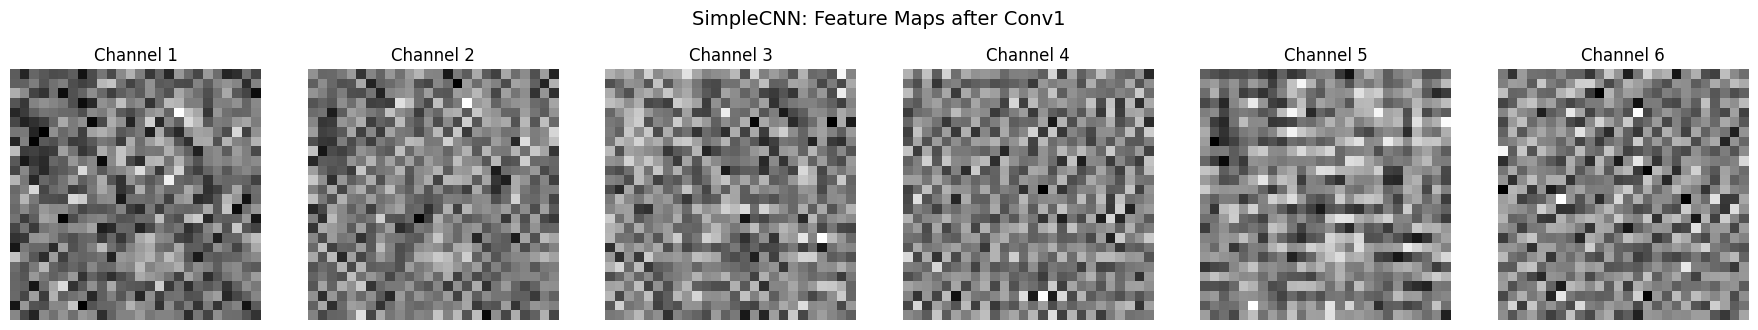

Shape after SimpleCNN conv2: torch.Size([1, 16, 24, 24])


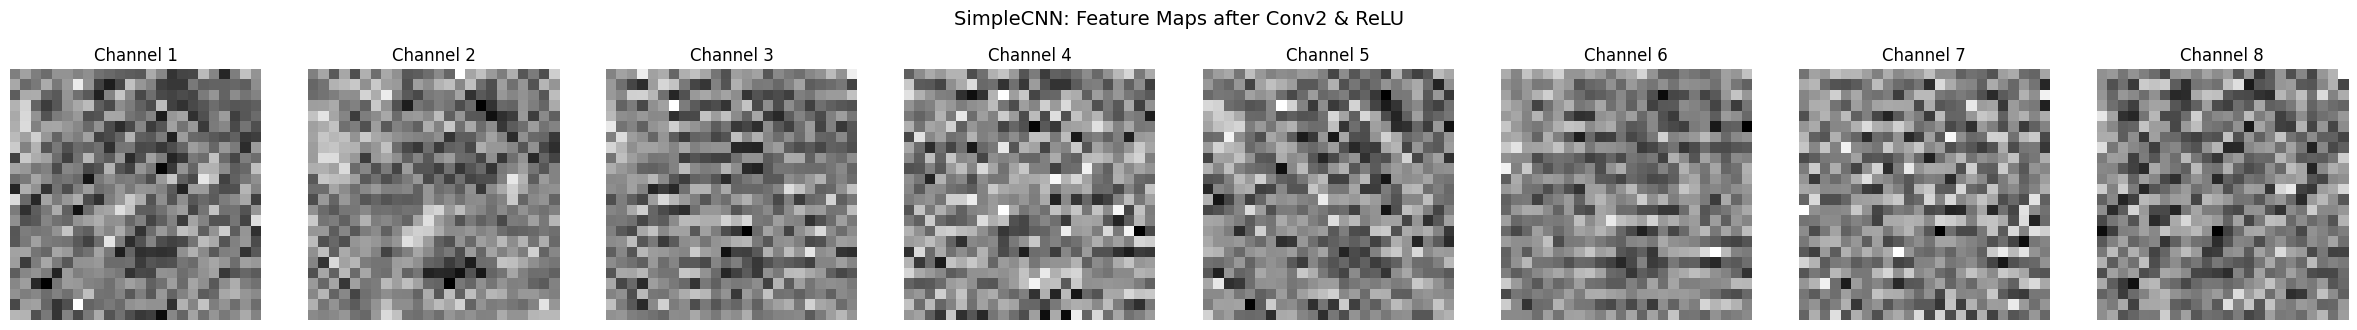

In [ ]:
# Instantiating the network
simple_model = SimpleCNN()

# Simulate input image: batch_size=1, channels=1, height=28, width=28
input_image = torch.rand((1, 1, 28, 28))
print(f"Input image shape: {input_image.shape}\n")

# --- Visualizing outputs from SimpleCNN ---
print("--- SimpleCNN Processing ---")
# Pass through conv1 manually to get intermediate output
out_conv1_simple = simple_model.conv1(input_image)
print(f"Shape after SimpleCNN conv1: {out_conv1_simple.shape}")
visualize_feature_maps(out_conv1_simple, num_maps_to_show=6, title="SimpleCNN: Feature Maps after Conv1")

# Apply ReLU
out_relu1_simple = nn.functional.relu(out_conv1_simple)

# Pass through conv2 manually
out_conv2_simple = simple_model.conv2(out_relu1_simple)
print(f"Shape after SimpleCNN conv2: {out_conv2_simple.shape}")
visualize_feature_maps(out_conv2_simple, num_maps_to_show=8, title="SimpleCNN: Feature Maps after Conv2 & ReLU")

# Full forward pass (for completeness, though we visualized parts already)
# final_output_simple = simple_model(input_image)
# print(f"Shape of final output from SimpleCNN: {final_output_simple.shape}")

## Step 4: Adjusting Convolutional Parameters



--- TunedCNN Processing ---
Shape after TunedCNN conv1 (K=5, S=2, P=1): torch.Size([1, 6, 13, 13])


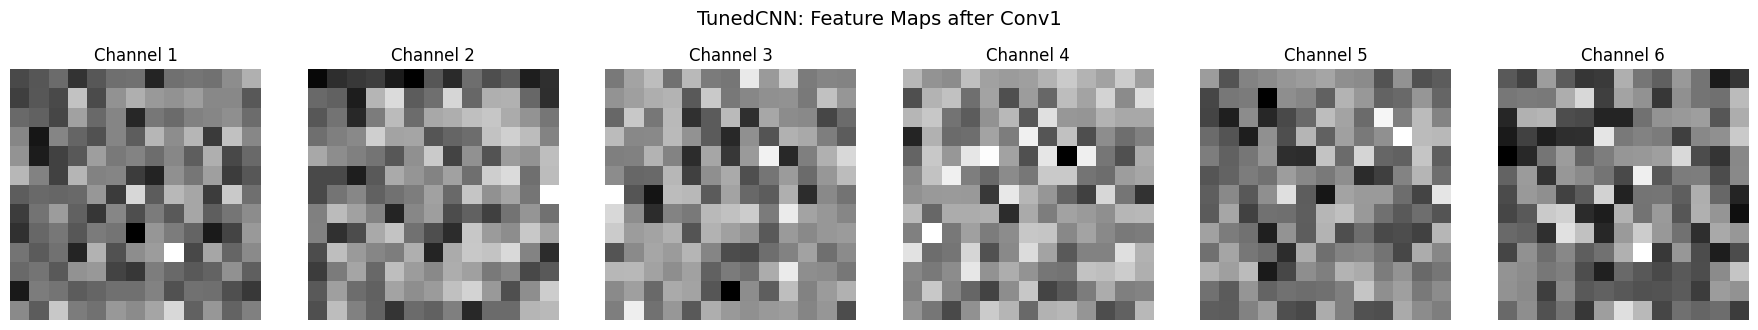

Shape after TunedCNN conv2 (K=3, S=1, P=1): torch.Size([1, 16, 13, 13])


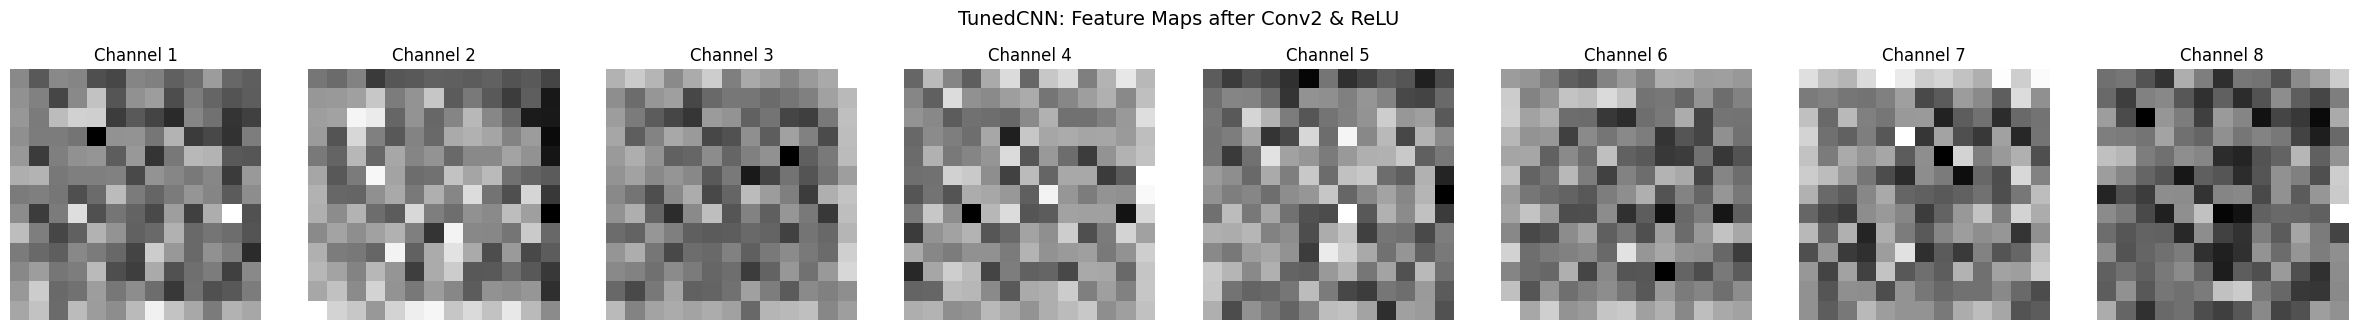

In [ ]:
# Adjust kernel size, stride, and padding
class TunedCNN(nn.Module):
    def __init__(self):
        super(TunedCNN, self).__init__()
        # Conv1: 1 input channel, 6 output channels
        # Kernel size = 5, Stride = 2, Padding = 1
        # Output size: (W - K + 2P)/S + 1 = (28 - 5 + 2*1)/2 + 1 = (25)/2 + 1 = 12.5 + 1 => 13 (due to floor)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=2, padding=1)

        # Conv2: 6 input channels, 16 output channels
        # Kernel size = 3, Stride = 1, Padding = 1 (often called 'same' padding for K=3, S=1)
        # Assuming input is 13x13 from conv1.
        # Output size: (13 - 3 + 2*1)/1 + 1 = (12)/1 + 1 = 13
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        return x

# Instantiating the tuned network
tuned_model = TunedCNN()

# --- Visualizing outputs from TunedCNN ---
print("\n--- TunedCNN Processing ---")
# Pass the same input image
# Pass through conv1 manually
out_conv1_tuned = tuned_model.conv1(input_image)
print(f"Shape after TunedCNN conv1 (K=5, S=2, P=1): {out_conv1_tuned.shape}")
visualize_feature_maps(out_conv1_tuned, num_maps_to_show=6, title="TunedCNN: Feature Maps after Conv1")

# Apply ReLU
out_relu1_tuned = nn.functional.relu(out_conv1_tuned)

# Pass through conv2 manually
out_conv2_tuned = tuned_model.conv2(out_relu1_tuned)
print(f"Shape after TunedCNN conv2 (K=3, S=1, P=1): {out_conv2_tuned.shape}")
visualize_feature_maps(out_conv2_tuned, num_maps_to_show=8, title="TunedCNN: Feature Maps after Conv2 & ReLU")

# Full forward pass
# final_output_tuned = tuned_model(input_image)
# print(f"Shape of final output from TunedCNN: {final_output_tuned.shape}")